In [ ]:
#header cell imports the packages needed for the functions and structures we use.

%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact
from IPython.display import display, HTML
import os
import pandas as pd
import seaborn as sns

def getFiles(path, kind='csv'):
    kind = '.'+kind
    fn = len(kind)
    filenames = []
    for root, dirs, files in os.walk(path):
        for f in files:
            if f[-fn:] == kind:
                filenames.append(os.path.join(root, f))
    print('Total number of {0} files: '.format(kind[1:]), len(filenames))
    return filenames 

dx = 0.156
dt = 1./15.

Populating the interactive namespace from numpy and matplotlib


# Data
The data consists of tracks from 27 different videos of wild type (WT) Salmonella in mouse GI mucus. An example is seen in the video below.

Note that the x, y positions are given in pixel coordinates and t is given in frames. The conversion to physical units is `dx=0.156` micrometers and `dt=0.0667` seconds.

***Does that mean 1 pixel is 0.156 micrometers? and that the time between two frames is 0.0667 seconds?***

### Our paper
https://www.nature.com/articles/s41385-020-0267-9.pdf?origin=ppub

## Get a list of all CSV files in the 'Tracks' folder (including subfolders)

In [ ]:
files = getFiles('./Tracks') #This is a relative address i.e.
#a folder named 'Tracks' that includes all files must be present at the current working directory.
files   #a list of the addresses to the 27 CSV files as strings of characters

Total number of csv files:  27


['./Tracks/160706_WT_Q_Ileum_NoAbAdded_1.csv',
 './Tracks/160706_WT_Q_Ileum_NoAbAdded_10.csv',
 './Tracks/160706_WT_Q_Ileum_NoAbAdded_9.csv',
 './Tracks/160706_WT_Q_JEjunum_NoAbAdded_6.csv',
 './Tracks/160706_WT_Q_Duodenum_NoAbAdded_1.csv',
 './Tracks/160706_WT_Q_Ileum_NoAbAdded_8.csv',
 './Tracks/160706_WT_Q_Duodenum_NoAbAdded_3.csv',
 './Tracks/160706_WT_Q_Duodenum_NoAbAdded_8.csv',
 './Tracks/160706_WT_Q_Duodenum_NoAbAdded_4.csv',
 './Tracks/160706_WT_Q_Ileum_NoAbAdded_11.csv',
 './Tracks/160706_WT_Q_Jejunum_NoAbAdded_7.csv',
 './Tracks/160706_WT_Q_Duodenum_NoAbAdded_5.csv',
 './Tracks/160706_WT_Q_Ileum_NoAbAdded_6.csv',
 './Tracks/160706_WT_Q_Jejunum_NoAbAdded_4.csv',
 './Tracks/160706_WT_Q_Jejunum_NoAbAdded_1.csv',
 './Tracks/160706_WT_Q_Ileum_NoAbAdded_3.csv',
 './Tracks/160706_WT_Q_Duodenum_NoAbAdded_9.csv',
 './Tracks/160706_WT_Q_Ileum_NoAbAdded_7.csv',
 './Tracks/160706_WT_Q_Jejunum_NoAbAdded_2.csv',
 './Tracks/160706_WT_Q_Ileum_NoAbAdded_2.csv',
 './Tracks/160706_WT_Q_Duodenu

In [ ]:

df=pd.DataFrame() #initiate an empty data frame for all the bacteria in all the files
speed_df=pd.DataFrame() #initiate an empty data frame for speeds of bacteria
total_means= [] #this will be the list of the average speed of each bacterium.
full_delta_x = []
full_delta_y = []

for filez in files:
  df=pd.read_csv(filez)

  deltax =[]
  deltay=[]

  for bacterium_number, bacterium in df.groupby('particle'):
     
    deltax.extend(diff(bacterium['x']))
    full_delta_x.extend(diff(bacterium['x']))
    deltay.extend(diff(bacterium['y']))
    full_delta_y.extend(diff(bacterium['y']))


  deltax=array(deltax)
  deltay=array(deltay)
  
  speed=sqrt(deltax**2+deltay**2) #this is vector of speeds

  maxz=max(df['particle'])
  numbers=zeros(maxz+1)
  for j in arange(0,maxz+1):
    N=array(df['particle']==j).sum() #the number of bacteria with label particle=j
    numbers[j]=N

  numofspeeds=numbers-1

  particles_for_speeds=[]
  for salmonella_num in arange(0,maxz+1):
    particles_for_speeds.extend(np.repeat(salmonella_num,numofspeeds[salmonella_num]))
  particles_for_speeds=array(particles_for_speeds)

  speed_df=pd.DataFrame({'particle':particles_for_speeds,'speed':speed})

  meanz=zeros(maxz+1)
  for particlez, particlezz in speed_df.groupby('particle'):
    meanz[particlez]=mean(particlezz['speed'])
  
  total_means.append(meanz)

In [ ]:
total_means #is an array of 27 lists (one for each file) where each of the lists 
            #have the average speed of every bacterium in that file.


[array([ 0.2740482 ,  0.6014274 ,  0.32756848,  0.28938511,  1.32555037,
         7.432208  ,  1.44792465,  0.48782897,  0.98830804,  0.78565744,
         0.5625015 ,  2.76994782,  8.64366194,  0.58398045,  0.77219885,
         2.05043793,  1.35993996,  1.19836306,  4.52333267,  1.09698291,
         1.02714833,  1.27405533,  6.59114239,  0.83712787,  0.75959369,
         0.60159211,  5.82527488,  0.67596305,  4.35034098,  3.94235582,
         0.67906766,  5.72418271,  0.7222406 ,  8.96194392,  1.87333338,
         0.74023676,  0.73116761,  5.8729242 ,  3.50901677,  2.20067015,
         1.46792948,  2.50245213,  2.31778798,  0.64206198,  0.90765016,
         6.62363844,  3.59380087,  1.8075751 ,  9.11945027,  1.42687928,
         1.43952939,  1.57259953,  0.97895938,  4.20854127,  3.88205203,
         4.0752156 ,  0.93928465,  0.94106781,  6.9885144 ,  1.06139466,
         1.32803209,  3.49684502,  1.00628636,  2.19068658, 10.75770553,
         1.58065877,  1.26366437,  5.26422643,  1.7

In [ ]:
concatenated_total_means=concatenate(total_means,axis=0)

In [ ]:
concatenated_total_means=concatenate(total_means,axis=0)
average_speed = mean(concatenated_total_means)
average_speed

3.0871736769353393

## Example of loading one file using Pandas

In [ ]:
print(files[0])
tracks = pd.read_csv(files[0])
tracks

./Tracks/160706_WT_Q_Duodenum_NoAbAdded_8.csv


,particle,x,y,t
0,0,449.135498,181.569962,0
1,0,449.013855,181.924683,1
2,0,449.019714,181.771240,2
3,0,449.084595,182.282349,3
4,0,448.999542,182.449219,4
...,...,...,...,...
5968,178,17.967628,201.434998,1
5969,178,11.757808,198.090897,2
5970,178,6.864400,195.920105,3
5971,178,3.821939,194.850311,4


In [ ]:
type(data_1)

pandas.core.frame.DataFrame

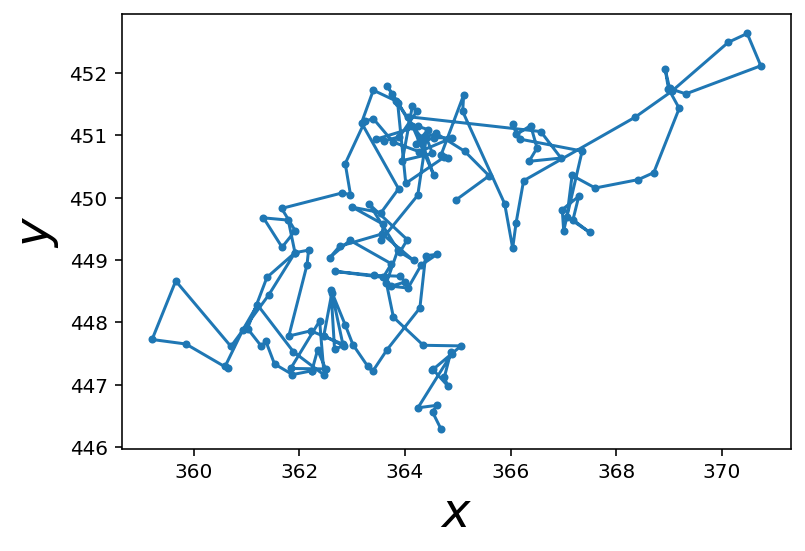

In [ ]:
#This is very reminiscent of the Midterm test.
track = data_6[data_6.particle==0]  #This is the bacterium labelled 0.
                  #This code could've been track = data_6[data_6['particle'==0]]
plot(track.x, track.y, '.-')
xlabel(r'$x$', fontsize=24)
ylabel(r'$y$', fontsize=24);

## Example of iterating over all tracks with the DataFrame `.groupby()` method

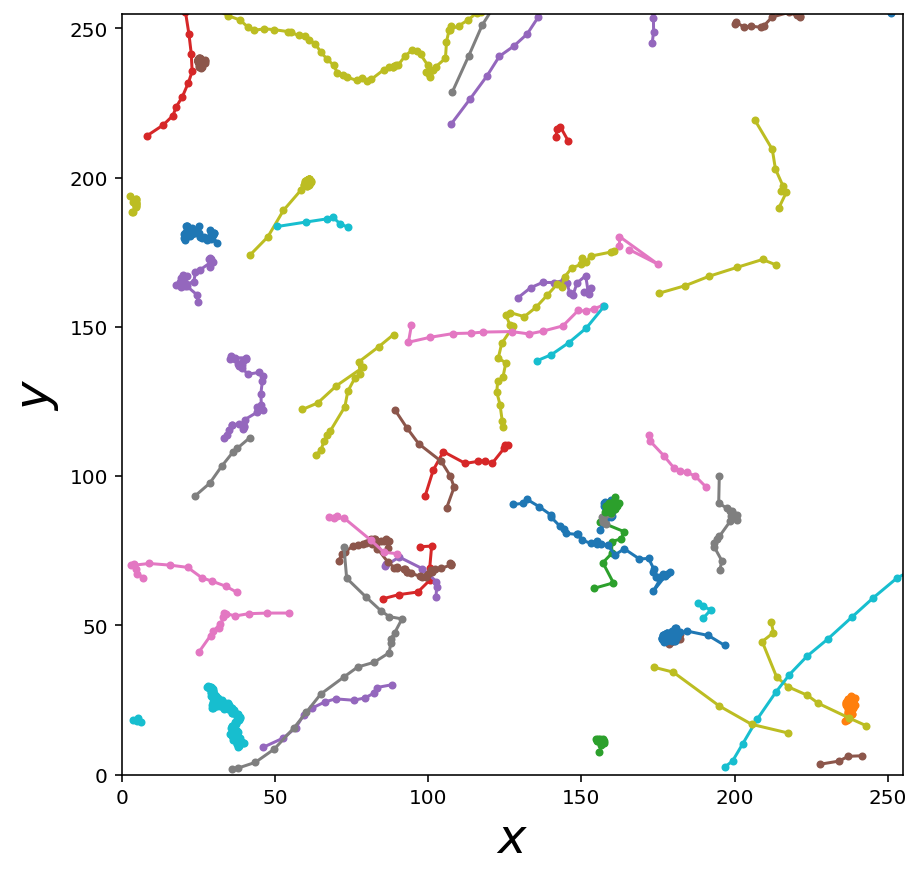

In [ ]:
figure(1, [7, 7])
for bacterium_number, bacterium in data_6.groupby('particle'):
    plot(bacterium.x, bacterium.y, '.-') #This could've been plot(track['x'],track['y'])
xlim(0, 255)
ylim(0, 255)
xlabel(r'$x$', fontsize=24)
ylabel(r'$y$', fontsize=24);

# Goal 1: Estimate swim speed
Assume that while swimming, individual Salmonella all swim at the same average speed and that the speed is the same regardless of what direction they happen to be swimming in. Using the track data, estimate the (magnitude) swim speed of Salmonella in mucus.

To get a general feel of what we should expect, let's look at the plot of $x$ verses time and then $y$ verses time.

In [ ]:
#Let's just do one bacterium in one file.
#Let's look at the 6th file in the Duodenum folder:
url6='https://raw.githubusercontent.com/newby-jay/SSC_Workshop_2021/main/Project%20Salmonella/Tracks/160706_WT_Q/Duodenum/160706_WT_Q_Duodenum_NoAbAdded_6.csv'
data_6 = pd.read_csv(url6, sep=",", header=0)  #first read all of the values


Text(0.5, 1.0, 'y component of the position of the untreated duodenum bacteria over time')

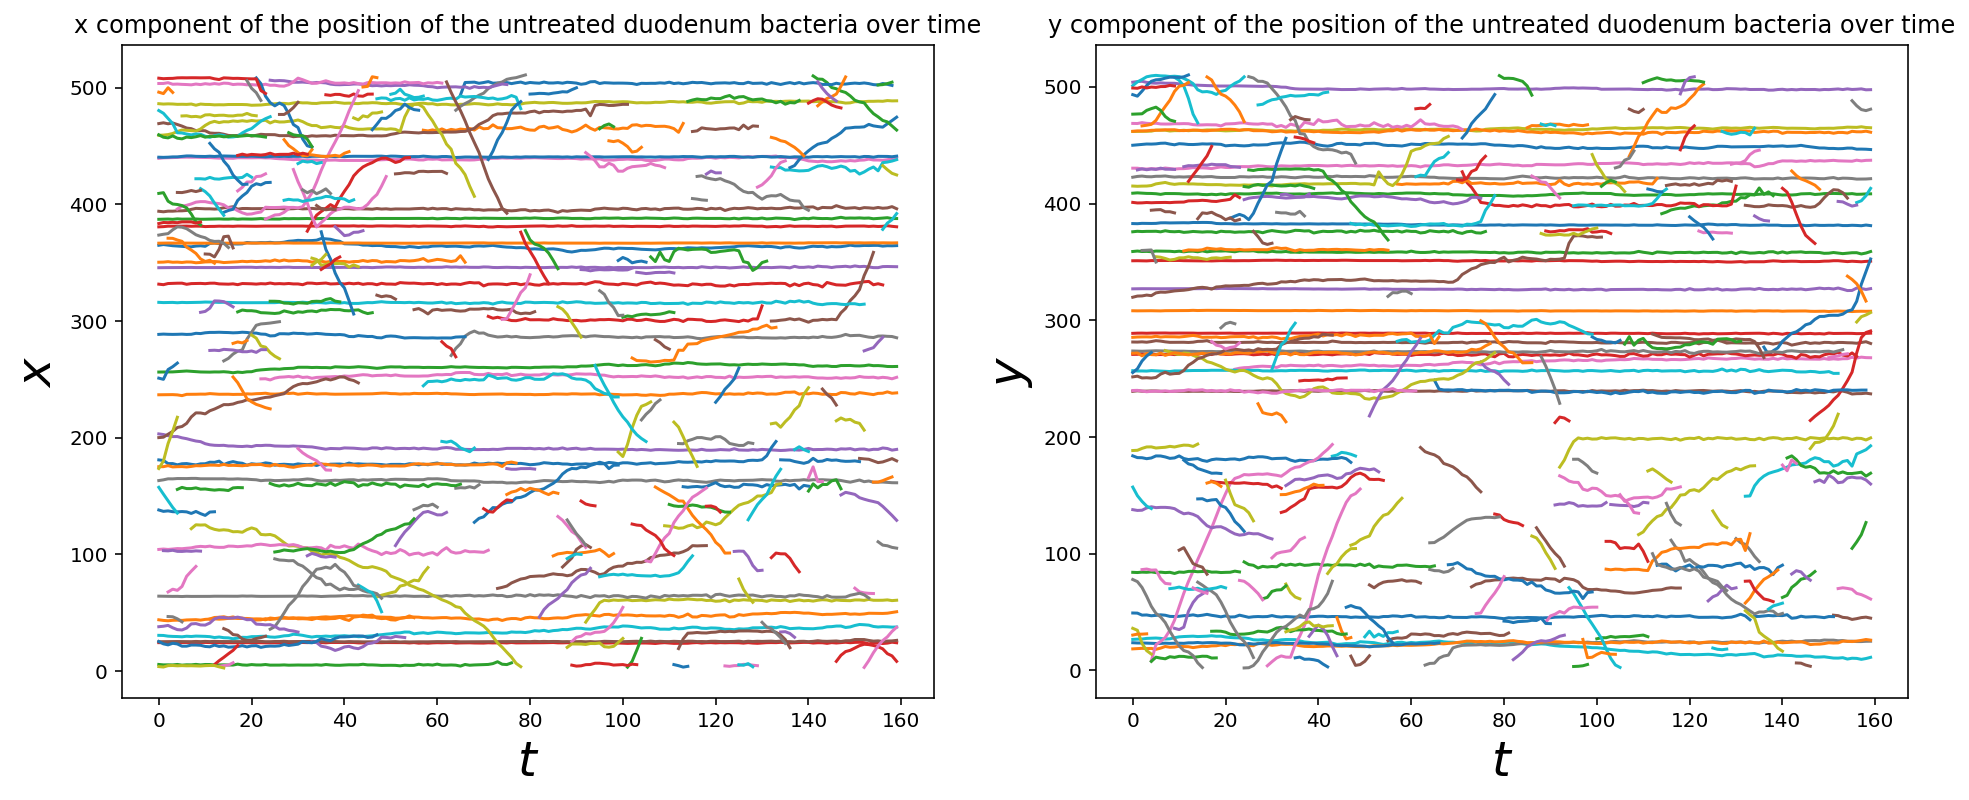

In [ ]:
fig=figure(1,[16,6])
subplot(1,2,1)
for bacterium_number, bacterium in data_6.groupby('particle'):
  plot(bacterium['t'],bacterium['x'])
xlabel(r'$t$', fontsize=24)
ylabel(r'$x$', fontsize=24)
title('x component of the position of the untreated duodenum bacteria over time')

subplot(1,2,2)
for bacterium_number, bacterium in data_6.groupby('particle'):
  plot(bacterium['t'],bacterium['y'])
xlabel(r'$t$', fontsize=24)
ylabel(r'$y$', fontsize=24)
title('y component of the position of the untreated duodenum bacteria over time')

Even though this data is for bacteria that are not yet treated with antibody, most of them seem to be relatively immobile. 

$$velocity=\begin{bmatrix}\frac{\Delta x}{\Delta t} \\\frac{\Delta y}{\Delta t}\end{bmatrix}$$

and since the time intervals are 1,

$$velocity=\begin{bmatrix}\ \Delta x\\\ \Delta y\end{bmatrix}$$

$$speed=\sqrt{deltax^2+deltay^2}$$



In [ ]:
#We will create an array of 27 lists (one for each file) where each of the lists 
#have the average speed of every bacterium in that file.

df=pd.DataFrame() #initiate an empty data frame for all the bacteria in all the files
speed_df=pd.DataFrame() #initiate an empty data frame for speeds of bacteria
total_means=[] #will be the list of (27 lists of) the average speed of each bacterium.

full_delta_x = [] #we'll use this in Goal2
full_delta_y = [] #we'll use this in Goal2

for filez in files:
  df=pd.read_csv(filez)

  deltax =[]
  deltay=[]

  for bacterium_number, bacterium in df.groupby('particle'):
     
    deltax.extend(diff(bacterium['x']))
    full_delta_x.extend(diff(bacterium['x']))
    deltay.extend(diff(bacterium['y']))
    full_delta_y.extend(diff(bacterium['y']))


  deltax=array(deltax)
  deltay=array(deltay)
  
  speed=sqrt(deltax**2+deltay**2) #this is vector of speeds

  maxz=max(df['particle'])
  numbers=zeros(maxz+1)
  for j in arange(0,maxz+1):
    N=array(df['particle']==j).sum() #the number of bacteria with label particle=j
    numbers[j]=N

  numofspeeds=numbers-1

  particles_for_speeds=[]
  for salmonella_num in arange(0,maxz+1):
    particles_for_speeds.extend(np.repeat(salmonella_num,numofspeeds[salmonella_num]))
  particles_for_speeds=array(particles_for_speeds)

  speed_df=pd.DataFrame({'particle':particles_for_speeds,'speed':speed})

  meanz=zeros(maxz+1)
  for particlez, particlezz in speed_df.groupby('particle'):
    meanz[particlez]=mean(particlezz['speed'])
  
  total_means.append(meanz)

In [ ]:
concatenated_total_means=concatenate(total_means,axis=0)
average_speed = mean(concatenated_total_means)
average_speed

3.0871736769353393

# Goal 2: Develop a stochastic model of Salmonella motion and predict the mean first passage time to cross a mucus barrier

Well I think the random walk Markov Chain would be a good model i.e. where the next position is Normal around the previous position.  

let $\textbf{X}_k$ denote the position of a bacterium at the $k$th time. 
$$\forall{k\in\mathbb{N_0}},\qquad \textbf{X}_k=\begin{bmatrix}x_k \\ y_k\end{bmatrix} $$

$$\forall{k\in\mathbb{N}},\qquad \textbf{X}_k \sim \operatorname{Norm}(\textbf{X}_{k-1},\Sigma)$$
Where $\Sigma$ is a diagonal matrix with the same entries on the diagonal i.e. to a bacterium directions are not distinct and movement in any of the axes is independent from others.
$$\begin{align} \forall{k\in\mathbb{N}},\qquad x_k \sim \operatorname{Norm}(x_{k-1},\sigma) \\ 
\forall{k\in\mathbb{N}},\qquad y_k \sim \operatorname{Norm}(y_{k-1},\sigma)\end{align}$$

In the above model, $\sigma$ is a measure of how far the next recorded position will be from the current recorded position. Clearly that will be proportional to how much on average the $x$ component (or the $y$ component) changes on one step in time.

In [ ]:

full_delta_x = absolute(full_delta_x)
full_delta_y = absolute(full_delta_y)
print(mean(full_delta_x))
print(mean(full_delta_y))
deltaz = (mean(full_delta_x) + mean(full_delta_y))/2
print(deltaz)

0.7828954105684232
0.7813758649670473
0.7821356377677352


In [ ]:
#To estimate sigma of the random walk
#we need to know at what Z-score CDF is 0.25 in standard Normal dist'n
#i.e. we need to know the invCDF(0.25) for standard Normal dist'n.
from scipy.stats import norm
z_score=norm.ppf(0.25) #the invCDF(0.25) for standard Normal dist'n

sigma_estimate=deltaz/abs(z_score) 
sigma_estimate

1.159596031726738

In [ ]:
Nsteps = 100000
Nsims = 1000
sigma = sigma_estimate

z0 = 320 #320 pixels * 0.156 microm/pixels = 50 microm
barrier = 0

time_of_passage = []
for j in range(1,Nsims+1):
    z = zeros(Nsteps)
    z[0] = z0
    for t in arange(1, Nsteps):
        z[t] = normal(z[t-1], sigma)
        if z[t] <= barrier:
            time_of_passage.append(t)
            break
        elif z[t] >= 640: #this is the reflective barrier. 
                           #640 pixels * 0.156 microm/pixels = 100 microm
            z[t] = 639

#print(time_of_passage)
first_time_of_passage_estimate = mean(time_of_passage)
first_time_of_passage_estimate , len(time_of_passage)

(49925.05454545454, 385)

# Goal 3: Estimate the fraction of cells that are mobile vs immobile

To get an idea of what we expect, let's look at the distribution of the speeds we calculated in Goal1.

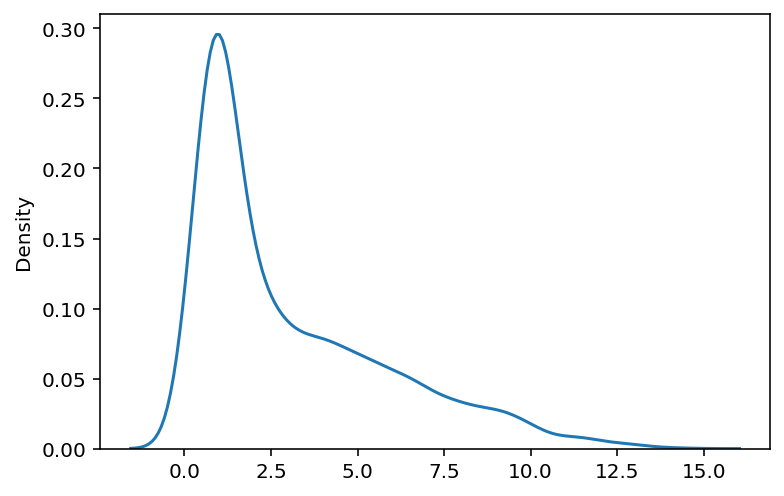

In [ ]:
sns.kdeplot(concatenated_total_means)

Looks like a Pareto-like distribution where most of the bacteria are immobile but a tiny amount are very mobile.

In [ ]:
Nsteps = 1000
Nsims = 100
sigma = sigma_estimate

z0 = 320 #320 pixels * 0.156 microm/pixel = 50 microm
barrier = 0
upper_limit=352   #   352 pixel * 0.156 microm/pixel   =55 microm
lower_limit=288   #   288 pixel * 0.156 microm/pixel   =45 microm

radii = []
for sim in range(1,Nsims+1):
    z = zeros(Nsteps+1)
    z[0] = z0
    for t in arange(1, Nsteps+1):
        z[t] = normal(z[t-1], sigma)
    radius=max(z)-min(z)
    radii.append(radius)




#print(time_of_passage)
radii=array(radii)

mobile=sum(radii>64)
immobile=Nsims-mobile
mobile , immobile

(26, 74)